# Data Analysis and Features

### Loading Data With yfinance

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

We define a function to fetch historical data

In [37]:
def fetch_stock_data(ticker, start_date, end_date):
    # Fetch stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [38]:
end_date = pd.Timestamp.today().normalize()
start_date = end_date - pd.DateOffset(years=15)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

print(end_date, start_date)

2025-08-10 00:00:00 2010-08-10 00:00:00


In [39]:
df_data = fetch_stock_data('GOOGL', start_date, end_date)
print(df_data.head(7))

C:\Users\leona\AppData\Local\Temp\ipykernel_8712\4183896547.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-08-10  12.530208  12.587174  12.402346  12.496376   82877040
2010-08-11  12.232444  12.388166  12.226473  12.381450   88831080
2010-08-12  12.239161  12.307320  12.002840  12.038413   88095816
2010-08-13  12.098363  12.218761  12.089904  12.164283   77310612
2010-08-16  12.079457  12.185926  11.952839  12.031944   52147800
2010-08-17  12.202095  12.306076  12.090403  12.152592   75552372
2010-08-18  11.993884  12.210801  11.978959  12.200105  107348544


In [40]:
df_data.isnull().sum()

Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64

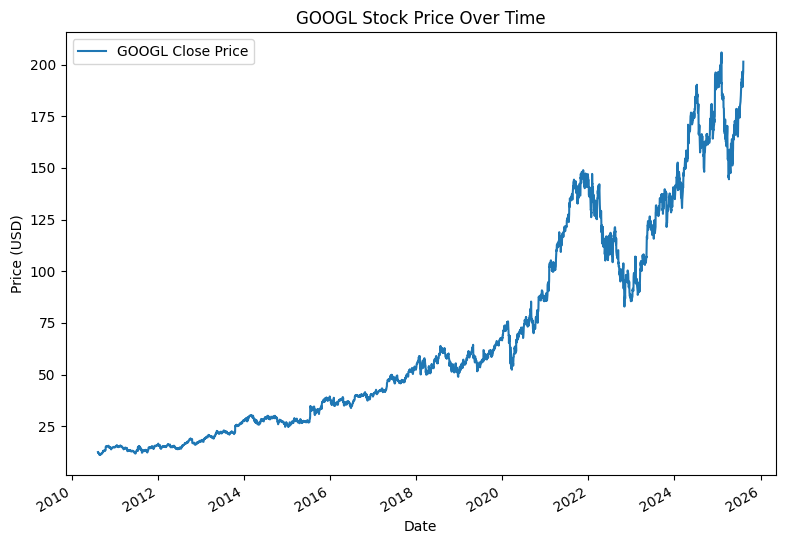

In [41]:
close_data = df_data['Close']
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(close_data.index, close_data.values, label='GOOGL Close Price')
ax.set_title('GOOGL Stock Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

### Defining Alpha Features

We define the momentum $M$ over a period of $n$ days as the ratio of the change of price at two times $t-n$ and $t$, over the price at $t-n$. Therefore:

\begin{equation}
M_{n}(t) = \frac{P_{t} - P_{t-n}}{P_{t-n}}
\end{equation}

            momentum_5  momentum_10  momentum_15
Date                                            
2010-08-31   -0.003035    -0.082565    -0.106589
2010-09-01    0.012560    -0.045256    -0.063875
2010-09-02    0.027052    -0.010236    -0.058596
2010-09-03    0.024998     0.017921    -0.033001
2010-09-07    0.025868     0.000711    -0.043638
2010-09-08    0.045687     0.042513    -0.040651
2010-09-09    0.034432     0.047424    -0.012382


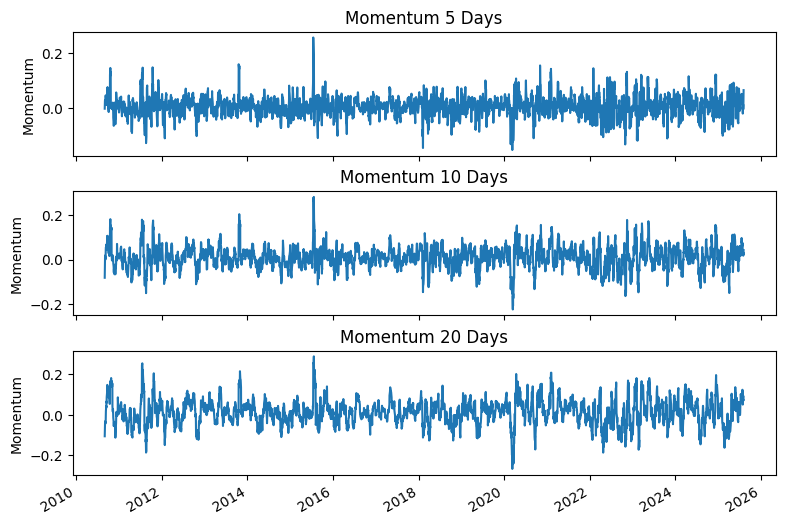

In [50]:
df_features = pd.DataFrame(index=df_data.index)
per = [5, 10, 15]

for p in per:
    df_features[f'momentum_{p}'] = df_data['Close'].pct_change(periods=p)

df_features = df_features.dropna()
print(df_features.head(7))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1 ,figsize=(8, 6), sharex=True)
ax1.plot(df_features.index, df_features['momentum_5'], label='Momentum 5 Days')
ax1.set_title('Momentum 5 Days')
ax1.set_ylabel('Momentum')
ax2.plot(df_features.index, df_features['momentum_10'], label='Momentum 10 Days')
ax2.set_title('Momentum 10 Days')
ax2.set_ylabel('Momentum')
ax3.plot(df_features.index, df_features['momentum_15'], label='Momentum 15 Days')
ax3.set_title('Momentum 20 Days')
ax3.set_ylabel('Momentum')
fig.tight_layout()
fig.autofmt_xdate()
plt.show()  



The rolling volatility is the volatility over the last $N$ days. This is:

$$
\text{Volatility}_n(t) = \sqrt{ \frac{1}{n} \sum_{i=0}^{n-1} \left( r_{t-i} - \bar{r}_{t,n} \right)^2 }
$$

Where:

- $n$ = lookback period in days
- $t$ = current time index
- $r_t$ = daily return at time $t$, calculated as:
  $$
  r_t = \frac{P_t}{P_{t-1}} - 1
  $$
- $P_t$ = closing price at time $t$
- $\bar{r}_{t,n}$ = mean daily return over the past $n$ days:
  $$
  \bar{r}_{t,n} = \frac{1}{n} \sum_{i=0}^{n-1} r_{t-i}
  $$


In [51]:
def rolling_volatility(series, window):
    returns = series.pct_change()
    return returns.rolling(window=window).std()

            momentum_5  momentum_10  momentum_15  volatility_5  volatility_10  \
Date                                                                            
2010-08-31   -0.003035    -0.082565    -0.106589      0.012557       0.014896   
2010-09-01    0.012560    -0.045256    -0.063875      0.016370       0.017477   
2010-09-02    0.027052    -0.010236    -0.058596      0.015263       0.015329   
2010-09-03    0.024998     0.017921    -0.033001      0.014886       0.015500   
2010-09-07    0.025868     0.000711    -0.043638      0.014630       0.016108   
2010-09-08    0.045687     0.042513    -0.040651      0.013460       0.013272   
2010-09-09    0.034432     0.047424    -0.012382      0.011363       0.013471   

            volatility_15  
Date                       
2010-08-31       0.013884  
2010-09-01       0.015128  
2010-09-02       0.015326  
2010-09-03       0.015933  
2010-09-07       0.016157  
2010-09-08       0.016357  
2010-09-09       0.016242  


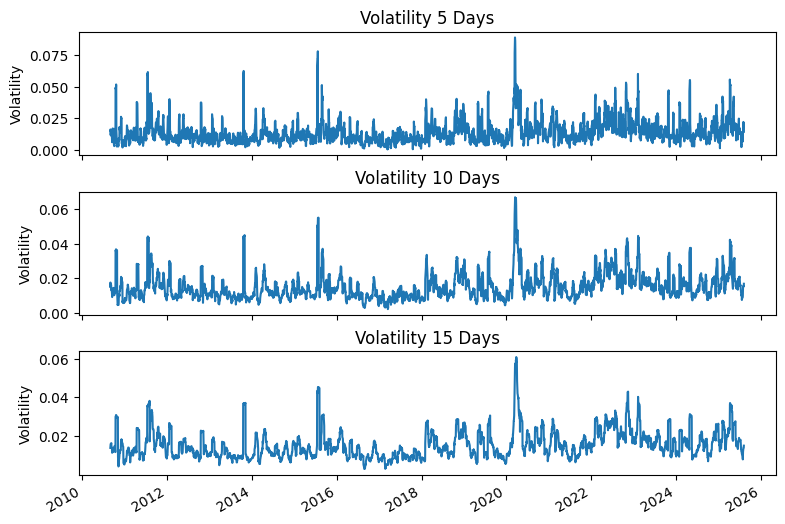

In [56]:
df_features['volatility_5'] = rolling_volatility(df_data['Close'], window=5)
df_features['volatility_10'] = rolling_volatility(df_data['Close'], window=10)
df_features['volatility_15'] = rolling_volatility(df_data['Close'], window=15)

df_features = df_features.dropna()
print(df_features.head(7))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1 ,figsize=(8, 6), sharex=True)
ax1.plot(df_features.index, df_features['volatility_5'], label='Volatility 5 Days')
ax1.set_title('Volatility 5 Days')
ax1.set_ylabel('Volatility')
ax2.plot(df_features.index, df_features['volatility_10'], label='Volatility 10 Days')
ax2.set_title('Volatility 10 Days')
ax2.set_ylabel('Volatility')
ax3.plot(df_features.index, df_features['volatility_15'], label='Volatility 15 Days')
ax3.set_title('Volatility 15 Days')
ax3.set_ylabel('Volatility')
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

The Moving Average Ratio takes the ratio of the current price $P_{t}$ and the rolling mean over a window of $n$ days. This is defined as

$$
\text{MA\_Ratio}_n(t) = \frac{P_t}{\frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}}
$$

Where:

- $n$ = lookback period in days
- $t$ = current time index
- $P_t$ = closing price at time $t$
- $\frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}$ = simple moving average (SMA) of closing prices over the past $n$ days


In [58]:
def rolling_MA_ratio(series, window):
    ratio =  series / series.rolling(window=window).mean()
    return ratio

df_features['MA_ratio_5'] = rolling_MA_ratio(df_data['Close'], window=5)
df_features['MA_ratio_10'] = rolling_MA_ratio(df_data['Close'], window=10)
df_features['MA_ratio_15'] = rolling_MA_ratio(df_data['Close'], window=15) 
df_features = df_features.dropna()
print(df_features.head(7))
    

            momentum_5  momentum_10  momentum_15  volatility_5  volatility_10  \
Date                                                                            
2010-08-31   -0.003035    -0.082565    -0.106589      0.012557       0.014896   
2010-09-01    0.012560    -0.045256    -0.063875      0.016370       0.017477   
2010-09-02    0.027052    -0.010236    -0.058596      0.015263       0.015329   
2010-09-03    0.024998     0.017921    -0.033001      0.014886       0.015500   
2010-09-07    0.025868     0.000711    -0.043638      0.014630       0.016108   
2010-09-08    0.045687     0.042513    -0.040651      0.013460       0.013272   
2010-09-09    0.034432     0.047424    -0.012382      0.011363       0.013471   

            volatility_15  MA_ratio_5  MA_ratio_10  MA_ratio_15  
Date                                                             
2010-08-31       0.013884    0.992484     0.979424     0.958720  
2010-09-01       0.015128    1.012671     1.006644     0.985079  
2010-0

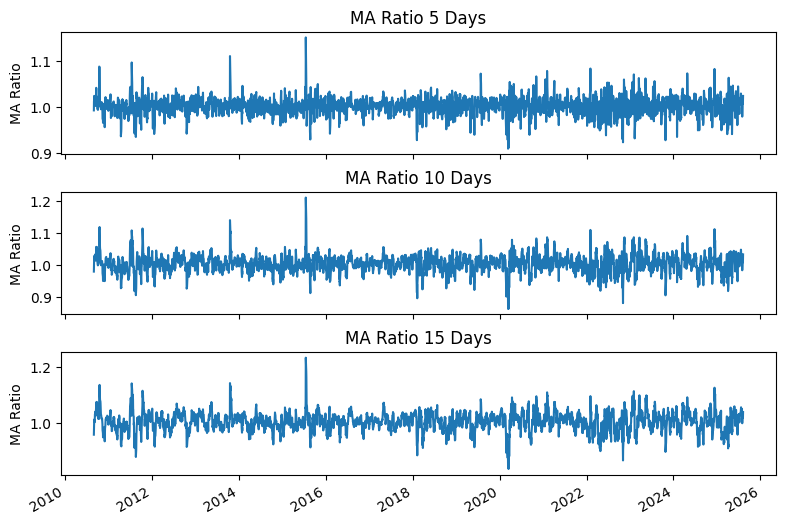

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1 ,figsize=(8, 6), sharex=True) 
ax1.plot(df_features.index, df_features['MA_ratio_5'], label='MA Ratio 5 Days')
ax1.set_title('MA Ratio 5 Days')
ax1.set_ylabel('MA Ratio')
ax2.plot(df_features.index, df_features['MA_ratio_10'], label='MA Ratio 10 Days')
ax2.set_title('MA Ratio 10 Days')
ax2.set_ylabel('MA Ratio')
ax3.plot(df_features.index, df_features['MA_ratio_15'], label='MA Ratio 15 Days')
ax3.set_title('MA Ratio 15 Days')
ax3.set_ylabel('MA Ratio')
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

The **Z-Score** measures how far the current price is from its recent mean, in units of standard deviation.  
It is used to identify whether the price is unusually high or low compared to its recent history.

$$
\text{ZScore}_n(t) = \frac{P_t - \mu_{t,n}}{\sigma_{t,n}}
$$

Where:

- $n$ = lookback period in days
- $t$ = current time index
- $P_t$ = closing price at time $t$
- $\mu_{t,n}$ = mean closing price over the past $n$ days:
  $$
  \mu_{t,n} = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}
  $$
- $\sigma_{t,n}$ = standard deviation of closing prices over the past $n$ days, defined as:
  $$
  \sigma_{t,n} = \sqrt{\frac{1}{n} \sum_{i=0}^{n-1} \left( P_{t-i} - \mu_{t,n} \right)^2 }
  $$


In [62]:
def z_score(series, window):
    roll_mean = series.rolling(window=window).mean()
    roll_std = series.rolling(window=window).std()
    z = (series - roll_mean) / roll_std
    return z

df_features['z_score_5'] = z_score(df_data['Close'], window=5)
df_features['z_score_10'] = z_score(df_data['Close'], window=10)
df_features['z_score_15'] = z_score(df_data['Close'], window=15)
df_features = df_features.dropna()
print(df_features.head(7))

            momentum_5  momentum_10  momentum_15  volatility_5  volatility_10  \
Date                                                                            
2010-08-31   -0.003035    -0.082565    -0.106589      0.012557       0.014896   
2010-09-01    0.012560    -0.045256    -0.063875      0.016370       0.017477   
2010-09-02    0.027052    -0.010236    -0.058596      0.015263       0.015329   
2010-09-03    0.024998     0.017921    -0.033001      0.014886       0.015500   
2010-09-07    0.025868     0.000711    -0.043638      0.014630       0.016108   
2010-09-08    0.045687     0.042513    -0.040651      0.013460       0.013272   
2010-09-09    0.034432     0.047424    -0.012382      0.011363       0.013471   

            volatility_15  MA_ratio_5  MA_ratio_10  MA_ratio_15  z_score_5  \
Date                                                                         
2010-08-31       0.013884    0.992484     0.979424     0.958720  -0.976161   
2010-09-01       0.015128    1.01267

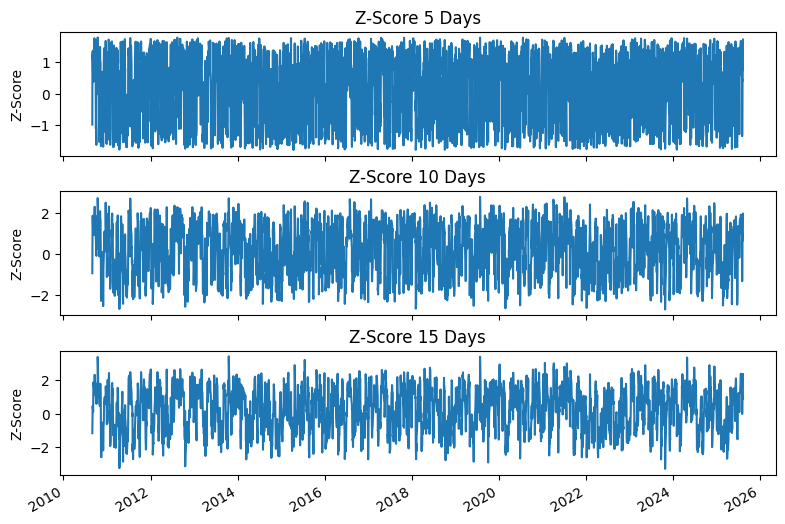

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1 ,figsize=(8, 6), sharex=True)
ax1.plot(df_features.index, df_features['z_score_5'], label='Z-Score 5 Days')
ax1.set_title('Z-Score 5 Days')
ax1.set_ylabel('Z-Score')
ax2.plot(df_features.index, df_features['z_score_10'], label='Z-Score 10 Days')
ax2.set_title('Z-Score 10 Days')
ax2.set_ylabel('Z-Score')
ax3.plot(df_features.index, df_features['z_score_15'], label='Z-Score 15 Days')
ax3.set_title('Z-Score 15 Days')
ax3.set_ylabel('Z-Score')
fig.tight_layout()
fig.autofmt_xdate()
plt.show()

In [66]:
def vol_spike(series, window):
    mean_vol = series.rolling(window=window).mean()
    spikes = series / mean_vol
    return spikes

In [68]:
df_features["vol_spike_5"] = vol_spike(df_data['Volume'], window=5)
df_features["vol_spike_10"] = vol_spike(df_data['Volume'], window=10)
df_features["vol_spike_15"] = vol_spike(df_data['Volume'], window=15)
df_features = df_features.dropna()
print(df_features.head(7))

            momentum_5  momentum_10  momentum_15  volatility_5  volatility_10  \
Date                                                                            
2010-08-31   -0.003035    -0.082565    -0.106589      0.012557       0.014896   
2010-09-01    0.012560    -0.045256    -0.063875      0.016370       0.017477   
2010-09-02    0.027052    -0.010236    -0.058596      0.015263       0.015329   
2010-09-03    0.024998     0.017921    -0.033001      0.014886       0.015500   
2010-09-07    0.025868     0.000711    -0.043638      0.014630       0.016108   
2010-09-08    0.045687     0.042513    -0.040651      0.013460       0.013272   
2010-09-09    0.034432     0.047424    -0.012382      0.011363       0.013471   

            volatility_15  MA_ratio_5  MA_ratio_10  MA_ratio_15  z_score_5  \
Date                                                                         
2010-08-31       0.013884    0.992484     0.979424     0.958720  -0.976161   
2010-09-01       0.015128    1.01267

In [69]:
df_features['vol_z_score_5'] = z_score(df_data['Volume'], window=5)
df_features['vol_z_score_10'] = z_score(df_data['Volume'], window=10)
df_features['vol_z_score_15'] = z_score(df_data['Volume'], window=15)
df_features = df_features.dropna()
print(df_features.head(7))

            momentum_5  momentum_10  momentum_15  volatility_5  volatility_10  \
Date                                                                            
2010-08-31   -0.003035    -0.082565    -0.106589      0.012557       0.014896   
2010-09-01    0.012560    -0.045256    -0.063875      0.016370       0.017477   
2010-09-02    0.027052    -0.010236    -0.058596      0.015263       0.015329   
2010-09-03    0.024998     0.017921    -0.033001      0.014886       0.015500   
2010-09-07    0.025868     0.000711    -0.043638      0.014630       0.016108   
2010-09-08    0.045687     0.042513    -0.040651      0.013460       0.013272   
2010-09-09    0.034432     0.047424    -0.012382      0.011363       0.013471   

            volatility_15  MA_ratio_5  MA_ratio_10  MA_ratio_15  z_score_5  \
Date                                                                         
2010-08-31       0.013884    0.992484     0.979424     0.958720  -0.976161   
2010-09-01       0.015128    1.01267